In [1]:
import ikpy
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink
import numpy as np
import ikpy.utils.plot as plot_utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

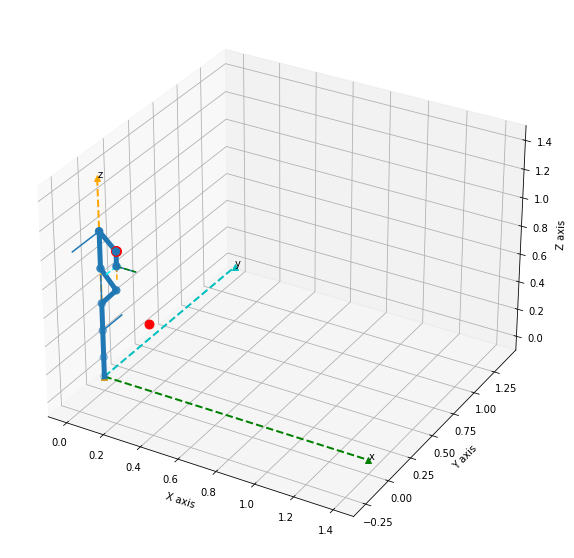

Len of links = 9
[Link name=Base link bounds=(None, None), Link name=joint_1 bounds=(-2.8973, 2.8973), Link name=joint_2 bounds=(-1.7628, 1.7628), Link name=joint_3 bounds=(-2.8973, 2.8973), Link name=joint_4 bounds=(-3.0718, -0.0698), Link name=joint_5 bounds=(-2.8973, 2.8973), Link name=joint_6 bounds=(-0.0175, 3.7525), Link name=joint_7n8 bounds=(-2.8973, 2.8973), Link name=joint_finger_center bounds=(None, None)]


In [2]:
class PandaEnv():
    def __init__(self):
        
        self.my_chain = Chain.from_urdf_file("./panda_with_bound.URDF")
        self.my_chain_ = Chain.from_urdf_file("./panda_with_bound_nofinger_center.URDF")
        self.state = [0]*10
        self.motorPosList =[0]*7
#         self.target_position = [0]*3
        self.target_position = np.array([0.2, 0.1, 0.4])
        self.show(Panda=True, target=self.target_position)
        
    def show_my_chain_links(self):
        print("Len of links =", len(self.my_chain.links))
        print(self.my_chain.links)
        
    def reset(self): 
        self.motorPosList =[0]*7
#         self.target_position = np.random.randn(3)
#         self.target_position = self.target_position/np.linalg.norm(self.target_position)/2
        
        self.state = self.target_position.tolist() + self.motorPosList
        return self.state
    
    def show(self, Panda="True", target=[0]*3, joints=[0]*9):
#         print("target =",target)
        clear_output(True)
        fig = plt.figure(figsize = (10, 10))
        ax = plt.gca(projection='3d')
        axis_len = 1.4
        ax.plot([0, axis_len], [0, 0],[0, 0], color='g', marker='^', linestyle='dashed', linewidth=2)
        ax.plot([0, 0], [0, axis_len],[0, 0], color='c', marker='^', linestyle='dashed', linewidth=2)
        ax.plot([0, 0], [0, 0],[0, axis_len], color='orange', marker='^', linestyle='dashed', linewidth=2)
        ax.text(axis_len,0,0,'x')
        ax.text(0,axis_len,0,'y')
        ax.text(0,0,axis_len,'z')
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        if(Panda):
            self.my_chain.plot(joints=joints, ax=ax, target=target)
            '''
            Param:
            joints (list) – The list of the positions of each joint
            ax (matplotlib.axes.Axes) – A matplotlib axes
            target (numpy.array) – An optional target
            show (bool) – Display the axe. Defaults to False
            '''
        joint6Pos = self.my_chain_.forward_kinematics(joints[0:8],full_kinematics=False)[:3,3]
        ax.scatter(joint6Pos[0], joint6Pos[1], joint6Pos[2], c='r', s=100, marker='o')
        plt.show()
        
#         plt.clf()
    def step_eval(self, action):
        self.motorPosList = [action[i] + self.motorPosList[i] for i in range(len(action))]
        self.motorPosList[0] = np.clip(self.motorPosList[0], -2.8973, 2.8973)
        self.motorPosList[1] = np.clip(self.motorPosList[1], -1.7628, 1.7628)
        self.motorPosList[2] = np.clip(self.motorPosList[2], -2.8973, 2.8973)
        self.motorPosList[3] = np.clip(self.motorPosList[3], -3.0718, -0.0698)
        self.motorPosList[4] = np.clip(self.motorPosList[4], -2.8973, 2.8973)
        self.motorPosList[5] = np.clip(self.motorPosList[5], -0.0175, 3.7525)
        self.motorPosList[6] = np.clip(self.motorPosList[6], -2.8973, 2.8973)
        
        new_state = self.target_position.tolist() + self.motorPosList
        self.show(Panda="True", target=self.target_position, joints=[0]+self.motorPosList+[0])
        endPointPos = self.my_chain.forward_kinematics([0]+self.motorPosList+[0],full_kinematics=False)[:3, 3]
        distance = np.linalg.norm(endPointPos-self.target_position)
        reward = -distance
        if distance < 0.03: 
            reward += 0.5
        elif distance < 0.015: 
            reward += 1.5
        if(distance < 0.01):
            done = True 
        else:
            done = False
        info = "nothing"
        self.state = new_state
        return new_state, reward, done, info
    
    def step(self, action)->tuple:
        self.motorPosList = [action[i] + self.motorPosList[i] for i in range(len(action))]
        self.motorPosList[0] = np.clip(self.motorPosList[0], -2.8973, 2.8973)
        self.motorPosList[1] = np.clip(self.motorPosList[1], -1.7628, 1.7628)
        self.motorPosList[2] = np.clip(self.motorPosList[2], -2.8973, 2.8973)
        self.motorPosList[3] = np.clip(self.motorPosList[3], -3.0718, -0.0698)
        self.motorPosList[4] = np.clip(self.motorPosList[4], -2.8973, 2.8973)
        self.motorPosList[5] = np.clip(self.motorPosList[5], -0.0175, 3.7525)
        self.motorPosList[6] = np.clip(self.motorPosList[6], -2.8973, 2.8973)
        
        new_state = self.target_position.tolist() + self.motorPosList
        
        endPointPos = self.my_chain.forward_kinematics([0]+self.motorPosList+[0],full_kinematics=False)[:3, 3]
        distance = np.linalg.norm(endPointPos-self.target_position)
        reward = -distance
        if distance < 0.03: 
            reward += 0.5
        elif distance < 0.015: 
            reward += 1.5
        if(distance < 0.01):
            done = True 
        else:
            done = False
        info = "nothing"
        self.state = new_state
        return new_state, reward, done, info
env = PandaEnv()
env.show_my_chain_links()

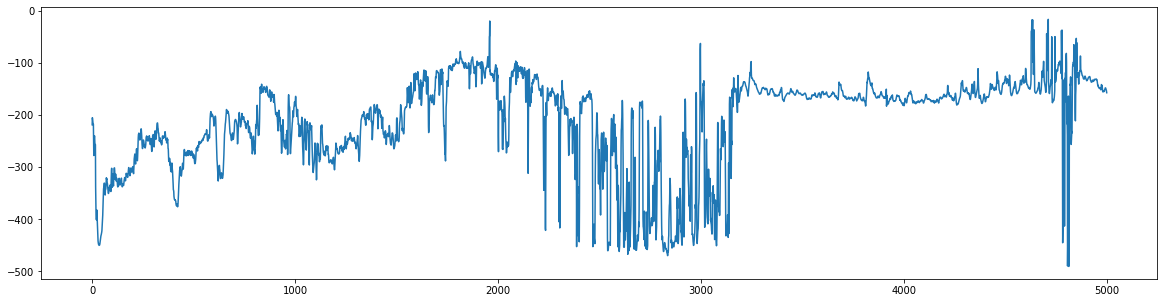

100%|██████████| 5000/5000 [31:13<00:00,  2.67it/s]


In [6]:
from naf import NAF as Agent
import numpy as np
from tqdm import tqdm
from replay_memory import ReplayMemory, Transition
from IPython.display import clear_output
import torch
def plot(scores):
        """Plot the training progresses."""
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.plot(scores)
        plt.show()

env = PandaEnv()
agent = Agent(0.99, 0.001, 400, 10, 7)
state = [0.2, 0.1, 0.4, -0.0038238726556301117, 0.004866842646151781, -0.004378997255116701, -0.0698, -0.0033328807912766933, -0.007323449477553368, -0.015520843677222729]

# for i in range(10):
#     print(agent.choose_action(state))
    
np.random.seed(0)

score_history = []

step_cnt = 0
memory = ReplayMemory(1000000)
for i in tqdm(range(5000)):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        batch_size = step_cnt
        step_cnt = step_cnt + 1
        
        if(step_cnt>500):
            step_cnt=0
            break
        act = agent.choose_action(obs)
        new_state, reward, done, info = env.step(np.array((act.squeeze().tolist()))*0.032)
            
#         print(done)
        action = torch.Tensor(act)
        mask = torch.Tensor([not done])
        next_state = torch.Tensor([new_state])
        reward = torch.Tensor([reward])
        
        memory.push(torch.FloatTensor(obs).unsqueeze(0), action, mask, next_state, reward)

        score += reward
        obs = new_state
        #env.render()
    transitions = memory.sample(batch_size)
#     print(transitions)
    batch = Transition(*zip(*transitions))
    agent.update_parameters(batch)
    score_history.append(score)
    agent.save_model("Panda")
    
    #if i % 25 == 0:
    #    agent.save_models()

#     print('episode ', i, 'score %.2f' % score,
#           'trailing 100 games avg %.3f' % np.mean(score_history[-100:]))
    plot(score_history)
# plotLearning(score_history, filename, window=100)

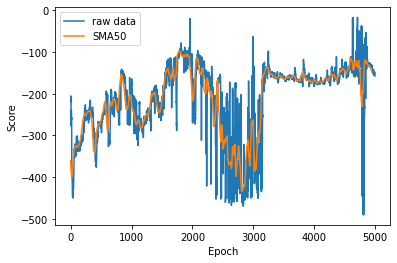

In [14]:
plt.plot(range(len(score_history)),score_history , label="raw data")
L = 50
SMA50 = []
cnt = 0
for i in range(len(score_history)-L):
    cnt = 0
    for j in range(L):
        cnt = cnt + score_history[i+j]
    SMA50.append(cnt/L)
plt.plot(range(len(SMA50)),SMA50 , label="SMA50")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
# agent.save_models()

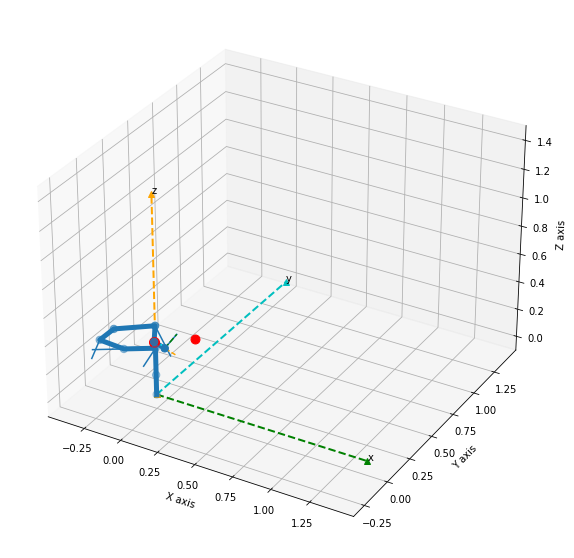

In [22]:
obs = env.reset()
done = False
score = 0
import time
flag =1
while not done:
    step_cnt = step_cnt + 1
    if(step_cnt>500):
        step_cnt=0
        break
    act = agent.choose_action(obs)
    new_state, reward, done, info = env.step_eval(np.array((act.squeeze().tolist()))*0.032)
        
    score += reward
    obs = new_state
    if(flag):
        time.sleep(10)
        flag = 0